In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression

price = alfa*shop_area + beta*promotion+gamma*employee  
price - объем годовых продаж;
shop_area - площадь торговой зоны; 
promotion - стоимость рекламы; 
employee - количество сотрудников; 
Предполагается, что чем больше рекламы, больше торговая зона и больше сотрудников работает - тем выше шанс увеличить объем годовой выручки.

In [215]:
n_samples = 1000

#генерирую линейно зависимые массивы данных
shop_area = np.random.choice(1000, n_samples)
price = shop_area + 500*np.random.sample(n_samples) 
promotion = price - 100*np.random.sample(n_samples)
employee = np.random.randint(1, 45, n_samples)

data = pd.DataFrame({'shop_area': shop_area,'promotion': promotion,'employee': employee, 'price': price})
data.head(15)

,shop_area,promotion,employee,price
0,481,689.775516,25,778.675406
1,780,1255.811161,13,1274.867246
2,110,39.530670,24,120.957254
3,959,1066.289964,3,1067.328072
4,470,938.117947,32,956.413214
5,246,417.745485,31,428.863427
6,740,949.577023,12,1036.823013
7,754,1093.233921,3,1155.473424
8,592,811.047766,34,828.888428
9,927,1000.057596,7,1003.703742


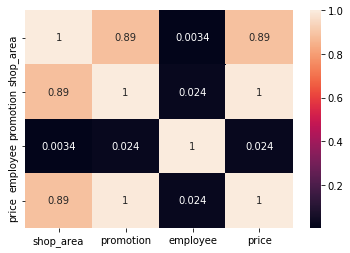

In [216]:
#Убеждаюсь, что объем годовой выручки линейно зависит от рекламы и торговой площади
sns.heatmap(data=data.corr(), annot=True)

In [218]:
#Строим множественную линейную регрессию. Она имеет вид price = 57.07 + 0.026*shop_area + 0.97*promotion + 0.004*employee. 
#Видим, что наибольший вклад в объем годовых продаж вносит реклама. 
#Коэффициент детерминации близок к единице => модель хорошо описывает данные. 
# Средняя абсолютная ошибка  = 24.92
from sklearn.metrics import mean_absolute_error

X = data[['shop_area', 'promotion', 'employee']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))
print('R2: {}'.format(reg.score(X, y)))
pred_values = reg.predict(data[['shop_area', 'promotion', 'employee']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [0.02604934 0.97019072 0.00462273]
Bias: 57.07221608214195
R2: 0.9917841087977064
Error: 24.92233000789253


In [220]:
#Убрав признаки: 'shop_area', 'employee' - качество модели не поменялось. 
#Можно сделать вывод, что эти признаки существенно не влияют на модель.
X = data[['promotion']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))
print('R2: {}'.format(reg.score(X, y)))
pred_values = reg.predict(data[['promotion']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [0.99107743]
Bias: 55.67169954441067
R2: 0.991664469891645
Error: 25.146190878027358
